<a href="https://colab.research.google.com/github/Guhan2348519/dl-lab-tasks/blob/main/2348519_DL_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense
from keras.layers import Dropout

In [4]:
data = pd.read_csv('/content/drive/MyDrive/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:

data.SeniorCitizen.replace([0, 1], ["No", "Yes"], inplace=True)
data.TotalCharges.replace([" "], ["0"], inplace=True)
data.TotalCharges = data.TotalCharges.astype(float)
data.drop("customerID", axis=1, inplace=True)
data.Churn.replace(["Yes", "No"], [1, 0], inplace=True)

In [8]:
data = pd.get_dummies(data)

In [11]:
X = data.drop("Churn", axis= 1)
y = data.Churn

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1234)

In [13]:
model = Sequential()

In [17]:

from keras.layers import Dense
from keras.constraints import max_norm

model.add(Dense(16, input_dim=46, activation='relu', kernel_constraint=max_norm(3)))

In [18]:
model.add(Dropout(rate=0.2))

In [20]:

from keras.layers import Dense
from keras.constraints import max_norm

model.add(Dense(8, activation='relu', kernel_constraint=max_norm(3)))

In [21]:
model.add(Dropout(rate=0.2))

In [22]:
model.add(Dense(1, activation='sigmoid'))

In [24]:

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import max_norm

model = Sequential()
model.add(Dense(16, input_dim=46, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(8, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=10)

Epoch 1/40
564/564 [==============================] - 3s 3ms/step - loss: 10.9389 - accuracy: 0.6858 - val_loss: 0.6313 - val_accuracy: 0.7424
Epoch 2/40
564/564 [==============================] - 1s 2ms/step - loss: 2.0562 - accuracy: 0.7265 - val_loss: 0.5898 - val_accuracy: 0.7424
Epoch 3/40
564/564 [==============================] - 1s 3ms/step - loss: 1.2958 - accuracy: 0.7302 - val_loss: 0.5666 - val_accuracy: 0.7459
Epoch 4/40
564/564 [==============================] - 2s 4ms/step - loss: 0.8519 - accuracy: 0.7451 - val_loss: 0.5554 - val_accuracy: 0.7488
Epoch 5/40
564/564 [==============================] - 2s 4ms/step - loss: 0.6190 - accuracy: 0.7515 - val_loss: 0.5392 - val_accuracy: 0.7644
Epoch 6/40
564/564 [==============================] - 1s 3ms/step - loss: 0.5827 - accuracy: 0.7533 - val_loss: 0.5339 - val_accuracy: 0.7686
Epoch 7/40
564/564 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.7591 - val_loss: 0.5284 - val_accuracy: 0.7686
Epoch

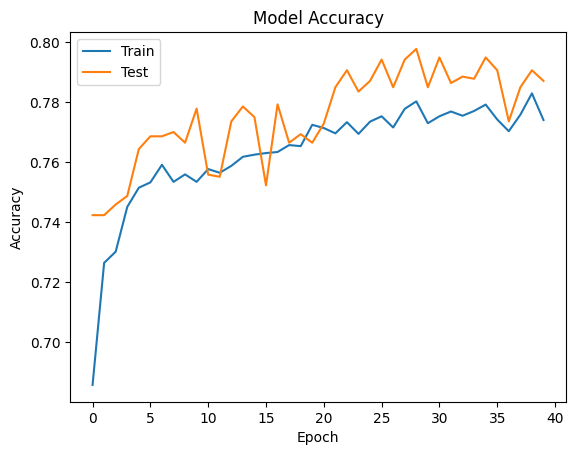

In [28]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

So there we have it. One neural network that produced around 79% accuracy for customer churn. Of course we can spend more time playing around with learning rates, activation functions, number of nodes, number of epochs etc to try and make it more accurate, but hopefully this is a solid baseline to start your investigation

Epoch 1/40
564/564 [==============================] - 3s 3ms/step - loss: 57.7908 - accuracy: 0.6074 - val_loss: 2.2887 - val_accuracy: 0.7559
Epoch 2/40
564/564 [==============================] - 1s 3ms/step - loss: 2.6676 - accuracy: 0.7084 - val_loss: 0.5621 - val_accuracy: 0.7573
Epoch 3/40
564/564 [==============================] - 3s 5ms/step - loss: 0.6215 - accuracy: 0.7384 - val_loss: 0.5684 - val_accuracy: 0.7410
Epoch 4/40
564/564 [==============================] - 3s 5ms/step - loss: 0.5777 - accuracy: 0.7407 - val_loss: 0.5659 - val_accuracy: 0.7438
Epoch 5/40
564/564 [==============================] - 1s 2ms/step - loss: 0.5645 - accuracy: 0.7496 - val_loss: 0.5429 - val_accuracy: 0.7658
Epoch 6/40
564/564 [==============================] - 1s 3ms/step - loss: 0.5654 - accuracy: 0.7460 - val_loss: 0.5510 - val_accuracy: 0.7537
Epoch 7/40
564/564 [==============================] - 1s 3ms/step - loss: 0.5614 - accuracy: 0.7496 - val_loss: 0.5521 - val_accuracy: 0.7466
Epoch

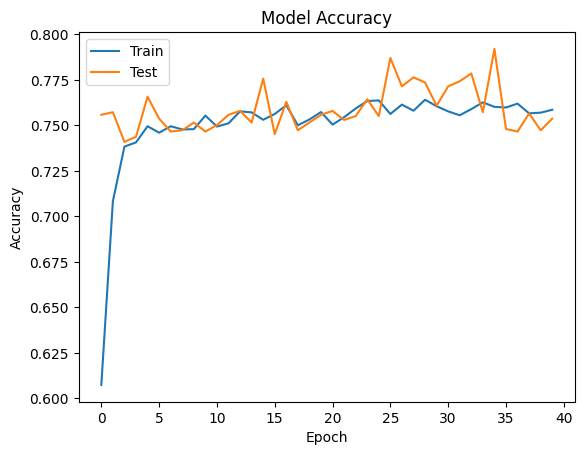

In [30]:

model = Sequential()

model.add(Dense(16, input_dim=46, activation='relu'))

# Dropout layer after the first hidden layer
model.add(Dropout(rate=0.5))

# Hidden layer with dropout
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=10)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/40
564/564 [==============================] - 3s 3ms/step - loss: 11.3622 - accuracy: 0.6116 - val_loss: 0.7672 - val_accuracy: 0.7424
Epoch 2/40
564/564 [==============================] - 2s 3ms/step - loss: 1.2646 - accuracy: 0.7080 - val_loss: 0.6053 - val_accuracy: 0.7424
Epoch 3/40
564/564 [==============================] - 1s 2ms/step - loss: 0.8616 - accuracy: 0.7220 - val_loss: 0.5846 - val_accuracy: 0.7424
Epoch 4/40
564/564 [==============================] - 1s 3ms/step - loss: 0.6993 - accuracy: 0.7258 - val_loss: 0.5767 - val_accuracy: 0.7424
Epoch 5/40
564/564 [==============================] - 2s 3ms/step - loss: 0.6498 - accuracy: 0.7311 - val_loss: 0.5735 - val_accuracy: 0.7424
Epoch 6/40
564/564 [==============================] - 2s 4ms/step - loss: 0.6032 - accuracy: 0.7325 - val_loss: 0.5679 - val_accuracy: 0.7424
Epoch 7/40
564/564 [==============================] - 2s 3ms/step - loss: 0.5931 - accuracy: 0.7350 - val_loss: 0.5693 - val_accuracy: 0.7424
Epoch

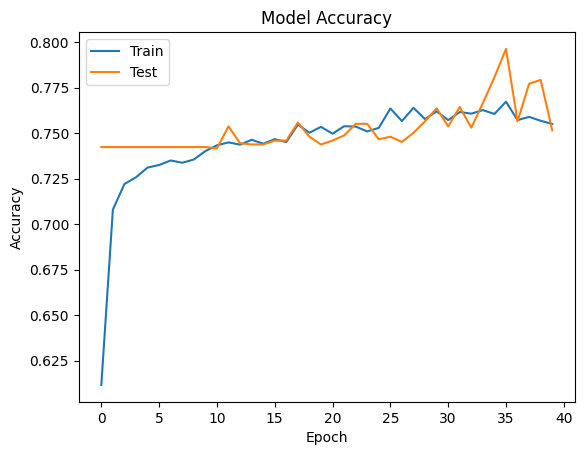

In [31]:
# Build the model
model = Sequential()

# Input layer
model.add(Dense(16, input_dim=46, activation='relu'))

# Dropout layer after the first hidden layer with dropout rate 0.2
model.add(Dropout(rate=0.2))

# Hidden layer with dropout rate 0.3
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=0.3))

# Hidden layer with dropout rate 0.4
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=0.4))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=10)

# Plot the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/40
564/564 [==============================] - 2s 3ms/step - loss: 1.9805 - accuracy: 0.7045 - val_loss: 0.6193 - val_accuracy: 0.7424
Epoch 2/40
564/564 [==============================] - 1s 3ms/step - loss: 0.6675 - accuracy: 0.7338 - val_loss: 0.5876 - val_accuracy: 0.7424
Epoch 3/40
564/564 [==============================] - 1s 2ms/step - loss: 0.6189 - accuracy: 0.7339 - val_loss: 0.5763 - val_accuracy: 0.7424
Epoch 4/40
564/564 [==============================] - 1s 3ms/step - loss: 0.5823 - accuracy: 0.7341 - val_loss: 0.5725 - val_accuracy: 0.7424
Epoch 5/40
564/564 [==============================] - 2s 3ms/step - loss: 0.5842 - accuracy: 0.7405 - val_loss: 0.5575 - val_accuracy: 0.7438
Epoch 6/40
564/564 [==============================] - 2s 4ms/step - loss: 0.5718 - accuracy: 0.7488 - val_loss: 0.5381 - val_accuracy: 0.7715
Epoch 7/40
564/564 [==============================] - 2s 4ms/step - loss: 0.5600 - accuracy: 0.7510 - val_loss: 0.5375 - val_accuracy: 0.7630
Epoch 

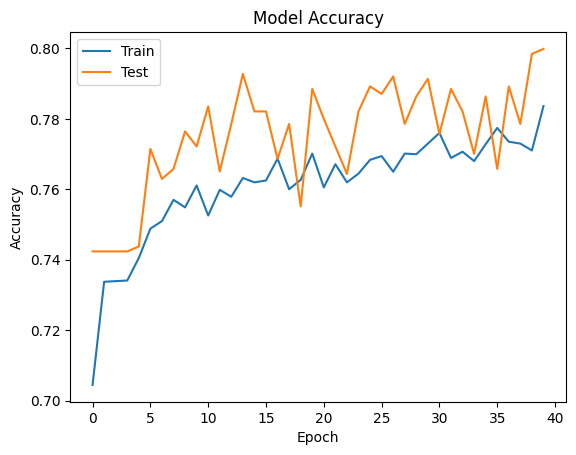

In [32]:
# Build the model
model = Sequential()

# Input layer
model.add(Dense(16, input_dim=46, activation='relu'))

# Dropout layer with Monte Carlo dropout during training and inference
model.add(Dropout(rate=0.2))

# Hidden layer
model.add(Dense(8, activation='relu'))

# Dropout layer with Monte Carlo dropout during training and inference
model.add(Dropout(rate=0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=10)

# Plot the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [38]:
def build_model(dropout_rate=None):
    model = Sequential()
    model.add(Dense(16, input_dim=46, activation='relu'))
    if dropout_rate:
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(8, activation='relu'))
    if dropout_rate:
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

def train_model(model, X_train, y_train, X_test, y_test, epochs=40, batch_size=10):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0)
    return history

def evaluate_model(model, X_test, y_test, threshold=0.5):
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1

In [40]:

from sklearn.metrics import accuracy_score, f1_score
# Baseline model
baseline_model = build_model()
baseline_history = train_model(baseline_model, X_train, y_train, X_test, y_test)
baseline_accuracy, baseline_f1 = evaluate_model(baseline_model, X_test, y_test)

# Model with dropout
dropout_model = build_model(dropout_rate=0.2)
dropout_history = train_model(dropout_model, X_train, y_train, X_test, y_test)
dropout_accuracy, dropout_f1 = evaluate_model(dropout_model, X_test, y_test)

# Model with layer-wise dropout
layerwise_dropout_model = build_model(dropout_rate=0.2)
layerwise_dropout_history = train_model(layerwise_dropout_model, X_train, y_train, X_test, y_test)
layerwise_dropout_accuracy, layerwise_dropout_f1 = evaluate_model(layerwise_dropout_model, X_test, y_test)

# Model with Monte Carlo dropout
monte_carlo_dropout_model = build_model(dropout_rate=0.2)
monte_carlo_dropout_history = train_model(monte_carlo_dropout_model, X_train, y_train, X_test, y_test)
monte_carlo_dropout_accuracy, monte_carlo_dropout_f1 = evaluate_model(monte_carlo_dropout_model, X_test, y_test)

45/45 [==============================] - 0s 1ms/step


45/45 [==============================] - 0s 3ms/step


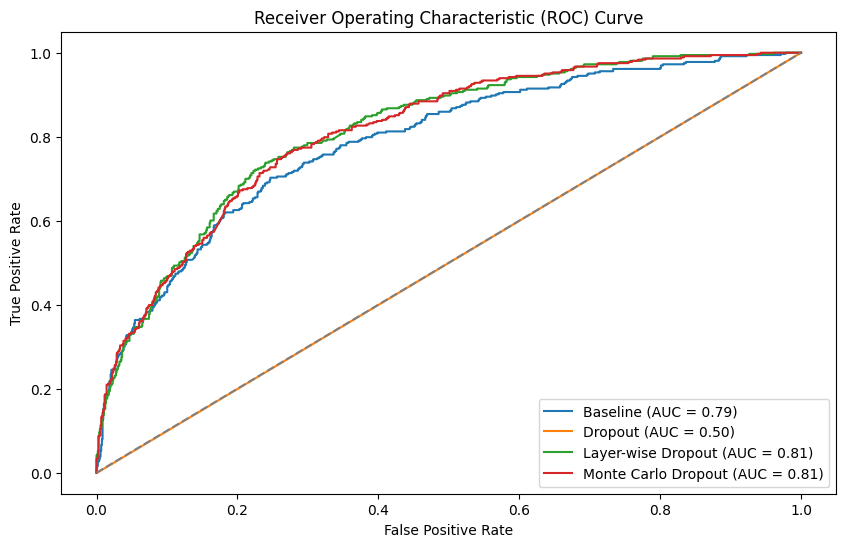

In [43]:


from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities using the model
baseline_y_pred_proba = baseline_model.predict(X_test).ravel()
dropout_y_pred_proba = dropout_model.predict(X_test).ravel()
layerwise_dropout_y_pred_proba = layerwise_dropout_model.predict(X_test).ravel()
monte_carlo_dropout_y_pred_proba = monte_carlo_dropout_model.predict(X_test).ravel()

# Compute ROC curve
baseline_fpr, baseline_tpr, _ = roc_curve(y_test, baseline_y_pred_proba)
dropout_fpr, dropout_tpr, _ = roc_curve(y_test, dropout_y_pred_proba)
layerwise_dropout_fpr, layerwise_dropout_tpr, _ = roc_curve(y_test, layerwise_dropout_y_pred_proba)
monte_carlo_dropout_fpr, monte_carlo_dropout_tpr, _ = roc_curve(y_test, monte_carlo_dropout_y_pred_proba)

# Compute ROC AUC score
baseline_roc_auc = roc_auc_score(y_test, baseline_y_pred_proba)
dropout_roc_auc = roc_auc_score(y_test, dropout_y_pred_proba)
layerwise_dropout_roc_auc = roc_auc_score(y_test, layerwise_dropout_y_pred_proba)
monte_carlo_dropout_roc_auc = roc_auc_score(y_test, monte_carlo_dropout_y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(baseline_fpr, baseline_tpr, label=f'Baseline (AUC = {baseline_roc_auc:.2f})')
plt.plot(dropout_fpr, dropout_tpr, label=f'Dropout (AUC = {dropout_roc_auc:.2f})')
plt.plot(layerwise_dropout_fpr, layerwise_dropout_tpr, label=f'Layer-wise Dropout (AUC = {layerwise_dropout_roc_auc:.2f})')
plt.plot(monte_carlo_dropout_fpr, monte_carlo_dropout_tpr, label=f'Monte Carlo Dropout (AUC = {monte_carlo_dropout_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()